In [1]:
#!/usr/bin/env python
# coding: utf-8

In[1]:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In[144]:

In [3]:
train = pd.read_csv(r'cs-training.csv').drop(['Unnamed: 0'],axis=1)
test = pd.read_csv(r'cs-test.csv').drop(['Unnamed: 0'],axis=1)

In[153]:

In [4]:
train.shape

(150000, 11)

In[154]:

In [5]:
test.shape

(101503, 11)

In[150]:

In [6]:
train_redup = train.drop_duplicates()

In[169]:

In [7]:
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In[202]:

In [8]:
train_redup.shape

(149391, 11)

In[170]:

In [9]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In[175]:

In [10]:
train_redup[train_redup.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In[178]:

In [11]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In[193]:

In [12]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In[194]:

In [13]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

C:\Users\suja7\AppData\Local\Temp\ipykernel_26968\693308875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
C:\Users\suja7\AppData\Local\Temp\ipykernel_26968\693308875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In[195]:

In [14]:
findMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In[196]:

In [15]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In[197]:

In [16]:
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In[198]:

In [17]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

C:\Users\suja7\AppData\Local\Temp\ipykernel_26968\100680096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In[199]:

In [18]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In[200]:

In [19]:
filled_train = pd.concat([fam_miss, fam_nmiss], ignore_index=True)

In[203]:

In [20]:
findMiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In[204]:

In [21]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.0,0.0,2,0,0,0,0.0
1,0,0.542243,48,2,10.0,0.0,2,0,0,0,0.0
2,0,0.041258,61,0,4739.0,0.0,11,0,4,0,0.0
3,0,0.000000,63,0,2.0,0.0,4,0,0,0,0.0
4,0,1.000000,28,0,0.0,0.0,0,0,0,0,0.0


In[207]:

In [22]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In[208]:

In [23]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In[218]:

In [24]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In[237]:

In [25]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In[243]:

In [26]:
util_droped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

In[249]:

<Axes: ylabel='age'>

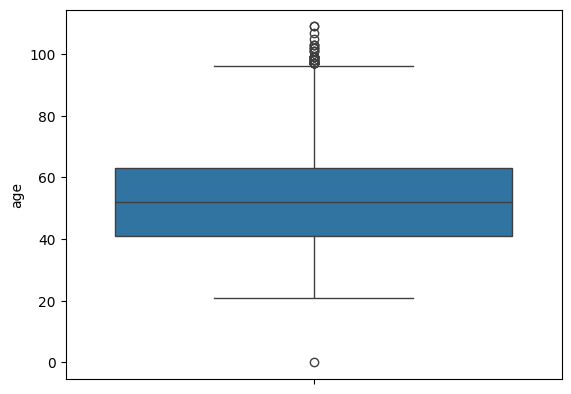

In [27]:
sns.boxplot(util_droped['age'])

In[251]:

In [28]:
util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In[252]:

In [29]:
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In[253]:

In [30]:
util_droped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In[258]:

In [31]:
util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In[260]:

In [32]:
util_droped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

In[262]:

<Axes: xlabel='DebtRatio', ylabel='Density'>

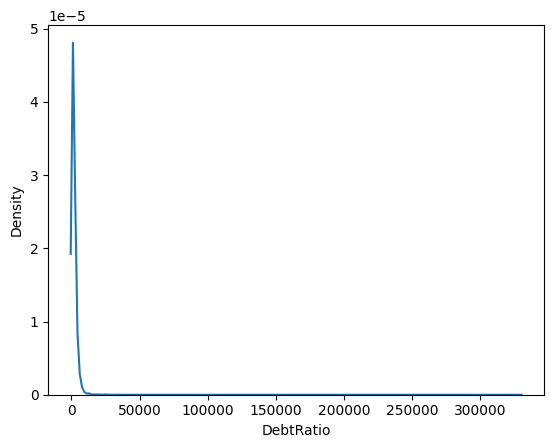

In [33]:
sns.kdeplot(util_droped['DebtRatio'])

In[289]:

In [34]:
util_droped['DebtRatio'].quantile([.975])

0.975    3492.0
Name: DebtRatio, dtype: float64

In[293]:

In [35]:
util_droped[util_droped['DebtRatio']>3492][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,3727.000000
mean,0.064395,4798.715321
std,0.245488,1698.867567
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In[297]:

In [36]:
temp = util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])]

In[300]:

In [37]:
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)

In[311]:

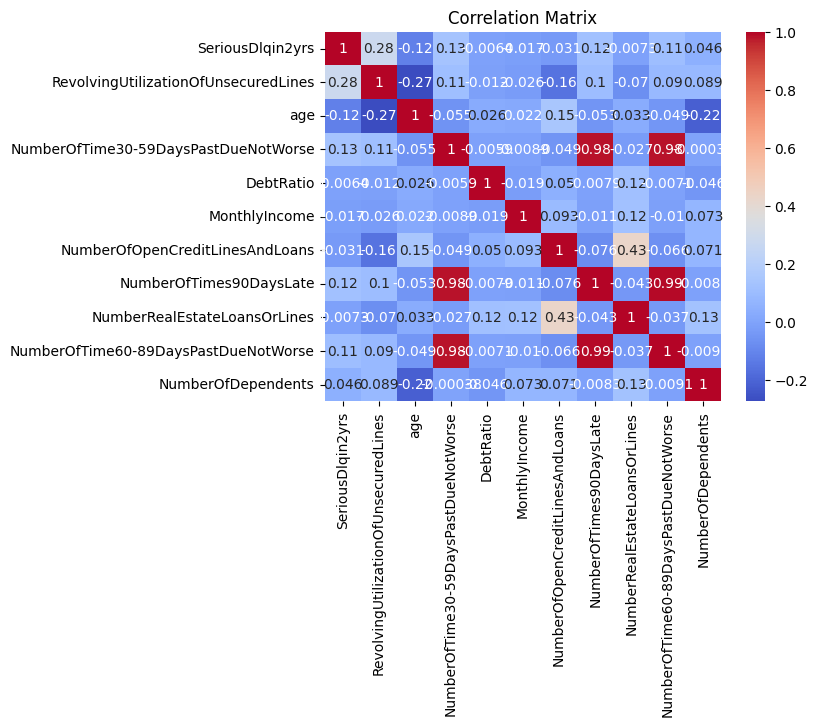

In [38]:
corr_matrix = dRatio.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
sns.pairplot(dRatio, hue='SeriousDlqin2yrs')
plt.title('Pairplot of Features')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001795CE3CB80> (for post_execute):


KeyboardInterrupt: 

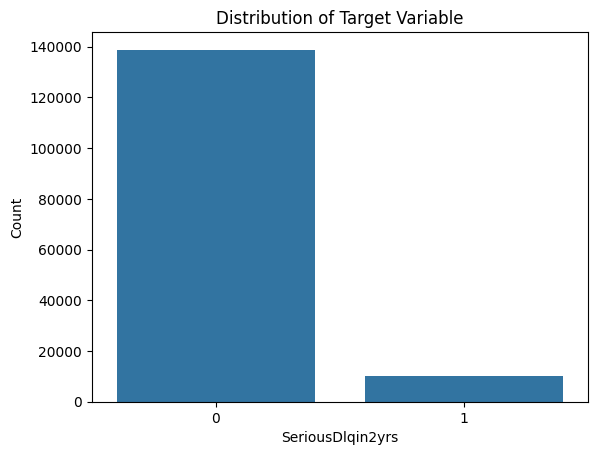

In [41]:
sns.countplot(x='SeriousDlqin2yrs', data=dRatio)
plt.title('Distribution of Target Variable')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Count')
plt.show()

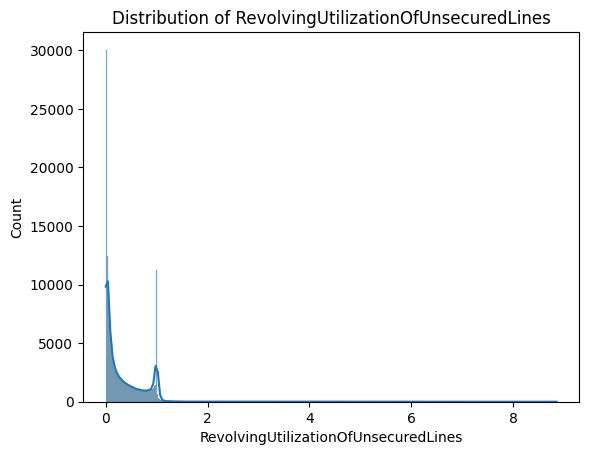

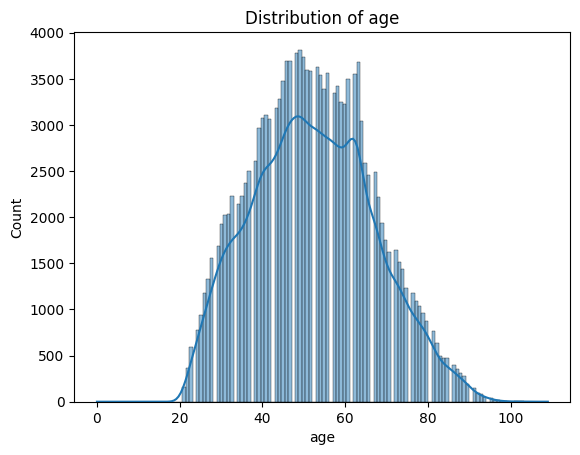

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001793FD17D80> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001795CE3CB80> (for post_execute):


KeyboardInterrupt: 

In [42]:
numeric_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']
for feature in numeric_features:
    sns.histplot(dRatio[feature], kde=True)
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [59]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = dRatio.drop('SeriousDlqin2yrs', axis=1)
y = dRatio['SeriousDlqin2yrs']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print("Class distribution after applying SMOTE:")
print(y_resampled.value_counts())

# Now you can use X_resampled and y_resampled in your model training

Class distribution after applying SMOTE:
SeriousDlqin2yrs
0    138778
1    138778
Name: count, dtype: int64


pip install Xgboost

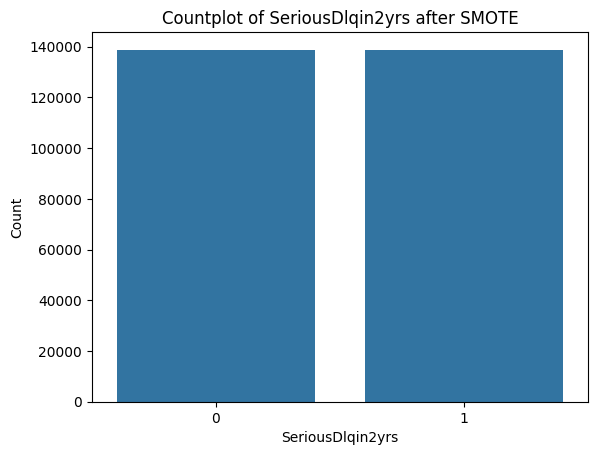

In [63]:
sns.countplot(x=y_resampled)
plt.title('Countplot of SeriousDlqin2yrs after SMOTE')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Count')
plt.show()

In[327]:

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In[320]:

In [65]:
model = XGBClassifier(tree_method = 'exact')

In[318]:

In [66]:
x = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
y = dRatio['SeriousDlqin2yrs']

In [67]:
target_value = 1  # The value you're interested in
column_of_interest = 'SeriousDlqin2yrs'  # The column you want to search within

filtered_rows = dRatio[dRatio[column_of_interest] == target_value]

# Print the filtered rows
print(filtered_rows)

        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
30                     1                              1.362142   73   
33                     1                              1.000000   41   
60                     1                              0.056025   58   
91                     1                              0.426295   64   
94                     1                              0.014246   80   
...                  ...                                   ...  ...   
149347                 1                              1.000000   46   
149348                 1                              1.135552   41   
149354                 1                              0.920107   31   
149360                 1                              0.983825   55   
149371                 1                              0.224711   55   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
30                                         1   274.000000            0.

In [68]:
print(x.head(5))

   RevolvingUtilizationOfUnsecuredLines  age  \
0                              0.116951   27   
1                              0.542243   48   
3                              0.000000   63   
4                              1.000000   28   
5                              0.024671   78   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     0       46.0            0.0   
1                                     2       10.0            0.0   
3                                     0        2.0            0.0   
4                                     0        0.0            0.0   
5                                     0      392.0            0.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                2                        0   
1                                2                        0   
3                                4                        0   
4                                0          

In[322]:

In [69]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

In [79]:
model.fit(X_resampled,y_resampled.values.ravel())
y_pred = model.predict(X_resampled)

In[323]:

In [80]:
accuracy_score(y_resampled,y_pred)

0.8931458876767211

In[325]:

In [81]:
cm = confusion_matrix(y_resampled,y_pred)

In [82]:
print(cm)

[[127216  11562]
 [ 18096 120682]]


In[326]:

Text(50.722222222222214, 0.5, 'actuals')

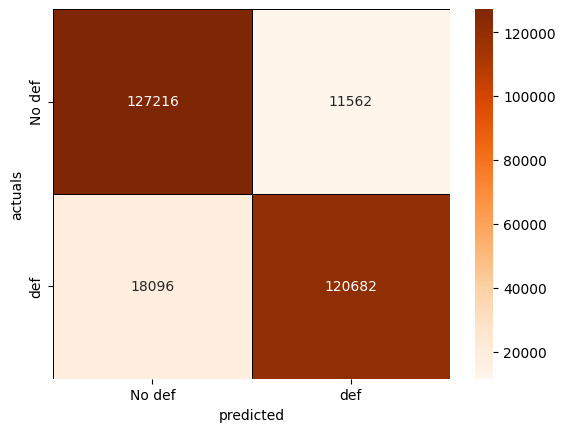

In [83]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In[328]:

In [84]:
print(classification_report(y_resampled,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90    138778
           1       0.91      0.87      0.89    138778

    accuracy                           0.89    277556
   macro avg       0.89      0.89      0.89    277556
weighted avg       0.89      0.89      0.89    277556



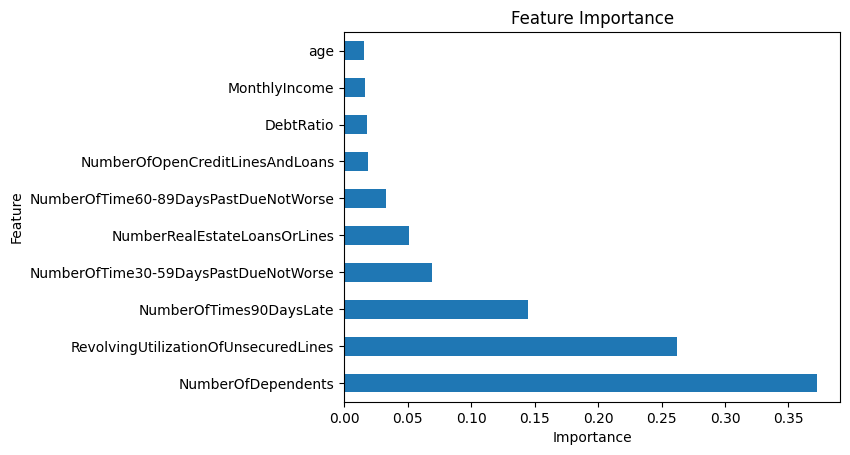

In [85]:
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [76]:
import pickle

In [77]:
# with open('filename.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_resampled,y_resampled.values.ravel())

# Make predictions on the testing data
predictions = rf_classifier.predict(X_resampled)

# Evaluate the model
accuracy = accuracy_score(y_resampled, predictions)
print("Accuracy:", accuracy)
print(classification_report(y_resampled,y_pred))

Accuracy: 0.99970096124746
              precision    recall  f1-score   support

           0       0.88      0.92      0.90    138778
           1       0.91      0.87      0.89    138778

    accuracy                           0.89    277556
   macro avg       0.89      0.89      0.89    277556
weighted avg       0.89      0.89      0.89    277556



Text(50.722222222222214, 0.5, 'actuals')

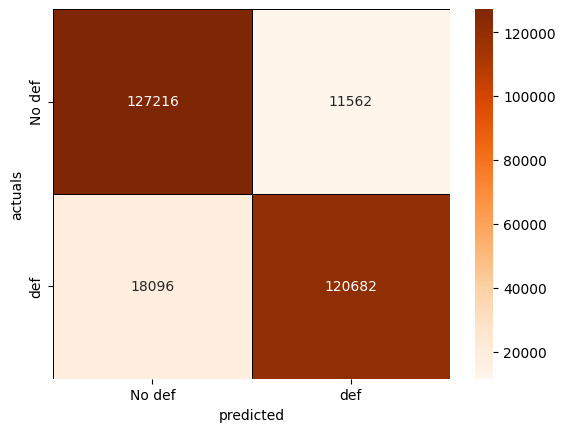

In [88]:
cm1 = confusion_matrix(y_resampled,y_pred)
sns.heatmap(cm1,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

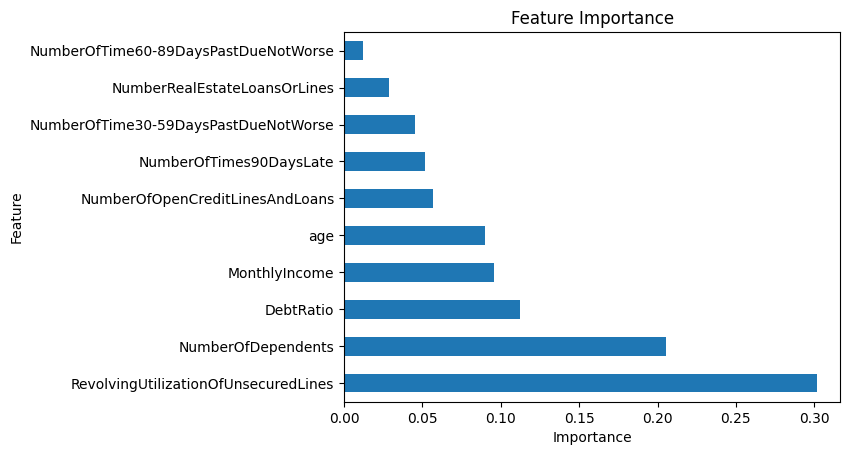

In [95]:
feature_importance = pd.Series(rf_classifier.feature_importances_, index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [107]:
input_data = pd.DataFrame({
    'RevolvingUtilizationOfUnsecuredLines': [1.361421],
    'age': [74],
    'NumberOfTime30-59DaysPastDueNotWorse': [1],
    'DebtRatio': [274],
    'MonthlyIncome': [0],
    'NumberOfOpenCreditLinesAndLoans': [0],
    'NumberOfTimes90DaysLate': [2],
    'NumberRealEstateLoansOrLines': [3],
    'NumberOfTime60-89DaysPastDueNotWorse': [0],
    'NumberOfDependents': [5]
})

# Make prediction
prediction = rf_classifier.predict(input_data)
print(prediction[0])

1
